In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [8]:
df_s = pd.read_csv('data/spatial-cdf-final.csv')
df_master = pd.read_csv('data/master-all-districts.csv')
df_master = df_master[df_master['District'].isin(pd.unique(df_s['District']))]
districts = pd.unique(df_master['NAME'])
districts

array(['Pashchim Champaran', 'Purba Champaran', 'Sheohar', 'Sitamarhi',
       'Madhubani', 'Supaul', 'Araria', 'Kishanganj', 'Purnia', 'Katihar',
       'Madhepura', 'Saharsa', 'Darbhanga', 'Muzaffarpur', 'Gopalganj',
       'Siwan', 'Saran', 'Vaishali', 'Samastipur', 'Begusarai',
       'Khagaria', 'Bhagalpur', 'Banka', 'Munger', 'Lakhisarai',
       'Sheikhpura', 'Nalanda', 'Patna', 'Bhojpur', 'Buxar',
       'Kaimur (Bhabua)', 'Rohtas', 'Aurangabad', 'Gaya', 'Nawada',
       'Jamui', 'Jehanabad ', 'Bargarh', 'Jharsuguda', 'Sambalpur',
       'Debagarh', 'Sundargarh', 'Kendujhar', 'Mayurbhanj', 'Baleshwar',
       'Bhadrak', 'Kendrapara', 'Jagatsinghapur', 'Cuttack', 'Jajapur',
       'Dhenkanal', 'Anugul', 'Nayagarh', 'Khordha', 'Puri', 'Ganjam',
       'Gajapati', 'Kandhamal', 'Baudh', 'Sonapur', 'Balangir', 'Nuapada',
       'Kalahandi', 'Rayagada', 'Nabarangapur', 'Koraput', 'Malkangiri',
       'Kachchh', 'Banas Kantha', 'Patan', 'Mahesana', 'Sabar Kantha',
       'Gandhinagar'

In [3]:
sum(df_master['ASSET_2011'] == 1)

70

In [10]:
# df_pdf = pd.read_csv('data/spatial-pdf-ma-test.csv')
df_cdf = pd.read_csv('data/spatial-cdf-raw-values.csv')
df_cdf = df_cdf.merge(df_master.loc[:, ['District', 'State', 'Name', 'NAME']])

In [34]:
def illustrate_hypo1(attr):
    dists_imp = df_master.loc[df_master[attr+'_2011'] > df_master[attr+'_2001'], 'District']
    dists_same = df_master.loc[df_master[attr+'_2011'] == df_master[attr+'_2001'], 'District']
    print('Number of districts which improved - ', len(dists_imp))    
    print('Number of districts which stayed the same - ', len(dists_same))
    df_impv = df_cdf.loc[df_cdf['District'].isin(dists_imp), :]
    df_same = df_cdf.loc[df_cdf['District'].isin(dists_same), :]
    df_impv['Year'] = '+ change'
    df_same['Year'] = 'no change'
    df_impv['Hue'] = df_impv['Name']+', '+df_impv['Year']
    df_same['Hue'] = 'no change'
    
    df_comb = pd.concat([df_impv, df_same])
#     df_comb['Hue'] = df_comb['Name']+', '+df_comb['Year']
    print(df_comb)
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 18))
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Comparing '+attr+' Spatial Variation of Districts that improved in '+attr+' from 2001 to 2011('+str(len(dists_imp))+') with districts that did not('+str(len(dists_same))+')')
    ax = axes.ravel()
    
    sns.lineplot(x="To", y=attr+'_RUD', ax=ax[0], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[0].set(title=attr+' RUD facilities spatial variation', ylabel='% of people using RUD facilities', xlabel='Distance Percentile')

    sns.lineplot(x="To", y=attr+'_INT', ax=ax[1], hue='Hue', palette=sns.color_palette("hls", len(pd.unique(df_comb['Hue']))), legend='full', data=df_comb)
    ax[1].set(title=attr+' INT facilities spatial variation', ylabel='% of people using INT facilities', xlabel='Distance Percentile')

    sns.lineplot(x="To", y=attr+'_ADV', ax=ax[2], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[2].set(title=attr+' ADV facilities spatial variation', ylabel='% of people using ADV facilities', xlabel='Distance Percentile')

#     plt.savefig('new-plots/'+attr.lower()+'-level-'+str(n)+'.png')
    plt.show()
    return df_comb

In [17]:
def illustrate_hypo2(attr, n):
    # Districts which reached Level-n in 2001 itself    
    dists_2001 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] == n), 'District']
    print(len(dists_2001))
    # Districts which reached Level-n in 2011 instead of 2001
    dists_2011 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] != n), 'District']
    print(len(dists_2011))
    df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
    df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
    df_2001.loc[:, 'Year'] = '2001'
    df_2011.loc[:, 'Year'] = '2011'
    df_comb = pd.concat([df_2001, df_2011])
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 18))
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Comparing '+attr+' Spatial Variation of Districts that reached \n Level-'+str(n)+' in 2001('+str(len(dists_2001))+') with Districts that reached Level-'+str(n)+' in 2011('+str(len(dists_2011))+')')
    ax = axes.ravel()
    
    sns.lineplot(x="To", y=attr+'_RUD', ax=ax[0], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[0].set(title=attr+' RUD facilities spatial variation', ylabel='% of people using RUD facilities', xlabel='Distance Percentile')

    sns.lineplot(x="To", y=attr+'_INT', ax=ax[1], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[1].set(title=attr+' INT facilities spatial variation', ylabel='% of people using INT facilities', xlabel='Distance Percentile')

    sns.lineplot(x="To", y=attr+'_ADV', ax=ax[2], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[2].set(title=attr+' ADV facilities spatial variation', ylabel='% of people using ADV facilities', xlabel='Distance Percentile')

    if not os.path.exists('new-plots/'):
        os.makedirs('new-plots/')
#     plt.savefig('new-plots/'+attr.lower()+'-level-'+str(n)+'.png')
    plt.show()

Number of districts which improved -  15
Number of districts which stayed the same -  149
      Unnamed: 0  From        To       Mid  District     Floor        Top  \
1298        1298     0  0.016949  0.008475       225  2.140909   5.161549   
1299        1299     0  0.033898  0.016949       225  2.140909   7.326738   
1300        1300     0  0.050847  0.025424       225  2.140909   8.796916   
1301        1301     0  0.067797  0.033898       225  2.140909  10.216243   
1302        1302     0  0.084746  0.042373       225  2.140909  11.329332   
1303        1303     0  0.101695  0.050847       225  2.140909  12.069780   
1304        1304     0  0.118644  0.059322       225  2.140909  12.610409   
1305        1305     0  0.135593  0.067797       225  2.140909  13.218080   
1306        1306     0  0.152542  0.076271       225  2.140909  13.751634   
1307        1307     0  0.169492  0.084746       225  2.140909  14.291568   
1308        1308     0  0.186441  0.093220       225  2.140909 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

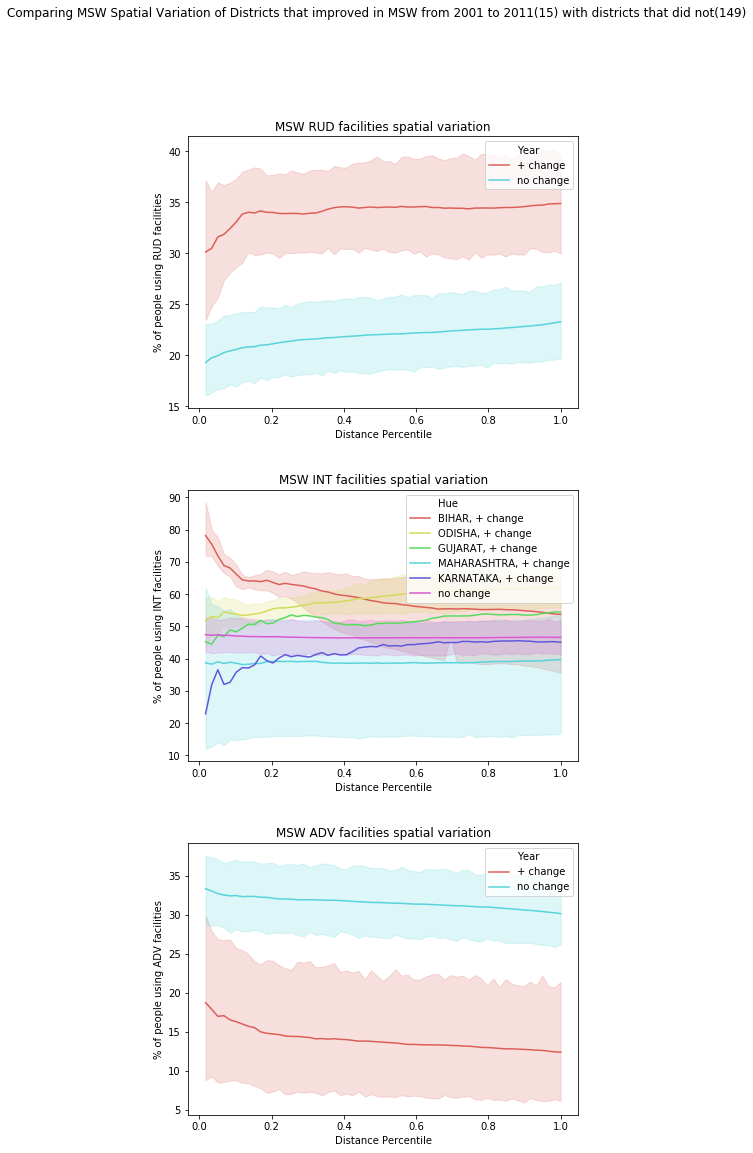

In [35]:
# illustrate_hypo1('BF')
# illustrate_hypo1('FC')
# illustrate_hypo1('CHH')
df_comb = illustrate_hypo1('MSW')
# illustrate_hypo1('MSL')

1298      BIHAR, + change
1299      BIHAR, + change
1300      BIHAR, + change
1301      BIHAR, + change
1302      BIHAR, + change
1303      BIHAR, + change
1304      BIHAR, + change
1305      BIHAR, + change
1306      BIHAR, + change
1307      BIHAR, + change
1308      BIHAR, + change
1309      BIHAR, + change
1310      BIHAR, + change
1311      BIHAR, + change
1312      BIHAR, + change
1313      BIHAR, + change
1314      BIHAR, + change
1315      BIHAR, + change
1316      BIHAR, + change
1317      BIHAR, + change
1318      BIHAR, + change
1319      BIHAR, + change
1320      BIHAR, + change
1321      BIHAR, + change
1322      BIHAR, + change
1323      BIHAR, + change
1324      BIHAR, + change
1325      BIHAR, + change
1326      BIHAR, + change
1327      BIHAR, + change
              ...        
9764    KERALA, no change
9765    KERALA, no change
9766    KERALA, no change
9767    KERALA, no change
9768    KERALA, no change
9769    KERALA, no change
9770    KERALA, no change
9771    KERA

In [ ]:
illustrate('MSL', 3)
illustrate('MSW', 2)
illustrate('MSW', 3)
illustrate('FC', 3)
# illustrate('FC', 2)
illustrate('BF', 3)
illustrate('CHH', 3)
illustrate('MSW', 3)
# illustrate('BF', 2)

In [6]:
def stat_test(attr, n, lvl):
    df_cdf['To'] = pd.Series(list(map(lambda x : round(x, 3), df_cdf['To'])))
    df_cdf['Mid'] = pd.Series(list(map(lambda x : round(x, 3), df_cdf['Mid'])))
    dists_2001 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] == n), 'District']
    print(len(dists_2001))
    dists_2011 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] != n), 'District']
    print(len(dists_2011))
    df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
    df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
    df_2001.loc[:, 'Year'] = '2001'
    df_2011.loc[:, 'Year'] = '2011'

    to_ind = pd.unique(df_2001['To'])
    print(to_ind)

    # df_2001_mean = df_2001.groupby('To').mean()
    # # print(df_2001_mean)
    # df_2001_mean = df_2001_mean.loc[:, [attr+'_RUD', attr+'_INT', attr+'_ADV']]
    # df_2001_std = df_2001.groupby('To').std()
    # df_2001_std = df_2001_std.loc[:, [attr+'_RUD', attr+'_INT', 'BF_ADV']]
    # n_2001 = len(dists_2001)

    # df_2011_mean = df_2011.groupby('To').mean()
    # df_2011_mean = df_2011_mean.loc[:, ['BF_RUD', 'BF_INT', 'BF_ADV']]
    # df_2011_std = df_2011.groupby('To').std()
    # df_2011_std = df_2011_std.loc[:, ['BF_RUD', 'BF_INT', 'BF_ADV']]
    # n_2011 = len(dists_2011)
    # print(n_2001, n_2011)
    # df_2001_mean

    group_2001 = df_2001.groupby('To')
    group_2011 = df_2011.groupby('To')
    dict_2001 = {}
    for i, j in group_2001:
        dict_2001[i] = list(j.loc[:, attr+'_'+lvl])

    dict_2011 = {}
    for i, j in group_2011:
        dict_2011[i] = list(j.loc[:, attr+'_'+lvl])
    import collections
    import scipy
    dict_2001 = collections.OrderedDict(sorted(dict_2001.items()))
    dict_2011 = collections.OrderedDict(sorted(dict_2011.items()))
    # print(dict_2001)
    # print(dict_2011)

    df_stat_test = pd.DataFrame(columns=['dist_percentile', 't_statistic', 'p_value'])
    j = 0
    for i in dict_2001.keys():
        x = scipy.stats.ttest_ind(dict_2001[i], dict_2011[i], equal_var=False)
        print(x[0])
        df_stat_test.loc[j, 'dist_percentile'] = i*100
        df_stat_test.loc[j, 't_statistic'] = x[0]
        df_stat_test.loc[j, 'p_value'] = x[1]
        j += 1
        
        df_stat_test.to_csv('new-plots/'+attr.lower()+'-dist-lbl-'+str(n)+'-vil-lbl-'+lvl.lower()+'.csv')
        
stat_test('MSW', 2, 'INT')
stat_test('MSW', 2, 'RUD')
stat_test('MSW', 2, 'ADV')

59
13
[0.017 0.034 0.051 0.068 0.085 0.102 0.119 0.136 0.153 0.169 0.186 0.203
 0.22  0.237 0.254 0.271 0.288 0.305 0.322 0.339 0.356 0.373 0.39  0.407
 0.424 0.441 0.458 0.475 0.492 0.508 0.525 0.542 0.559 0.576 0.593 0.61
 0.627 0.644 0.661 0.678 0.695 0.712 0.729 0.746 0.763 0.78  0.797 0.814
 0.831 0.847 0.864 0.881 0.898 0.915 0.932 0.949 0.966 0.983 1.   ]
4.6059045611697895
5.65884562613444


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


6.78305976280992
7.221947257693457
7.179687860913492
8.01196708842266
8.815886672224892
9.112163630374932
8.61418949389775
9.089923017971165
8.986090723405736
9.027311613426631
9.286086821543057
9.185726782129187
9.186927700251015
9.078348041915003
8.900708859558247
8.709305618875947
8.59144789738635
8.604117735924184
8.540512622940197
8.611981821500864
8.499018460415556
8.320855100948336
8.26859944808883
8.093925556108923
8.082543798914102
8.018030423356516
7.888622982091927
7.833643945080098
7.823154672834058
7.729973364624101
7.660337762165044
7.534017352695592
7.5673156528583965
7.478958550872258
7.445117685149775
7.354917962356714
7.388728056290508
7.328878743543498
7.27446626418859
7.200083460385305
7.190058344054138
7.127455063648589
7.152986917356751
7.11931304188752
7.195984312042986
7.181960670638626
7.196999312112985
7.134230223812953
7.158921955617293
7.174606826589626
7.129171511313809
7.146508017735408
7.063278354106917
7.027620023515716
7.0446956682220465
6.9646198421410

16
147


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


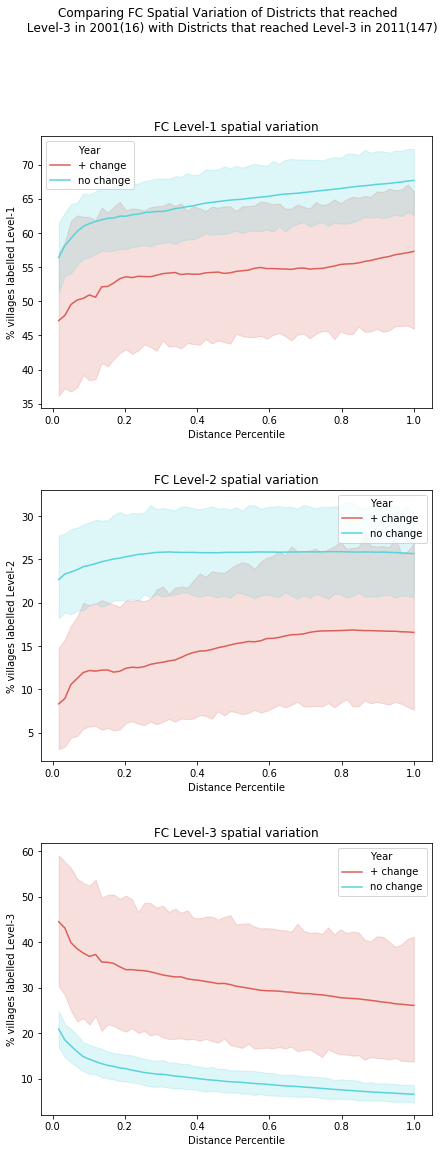

31
131


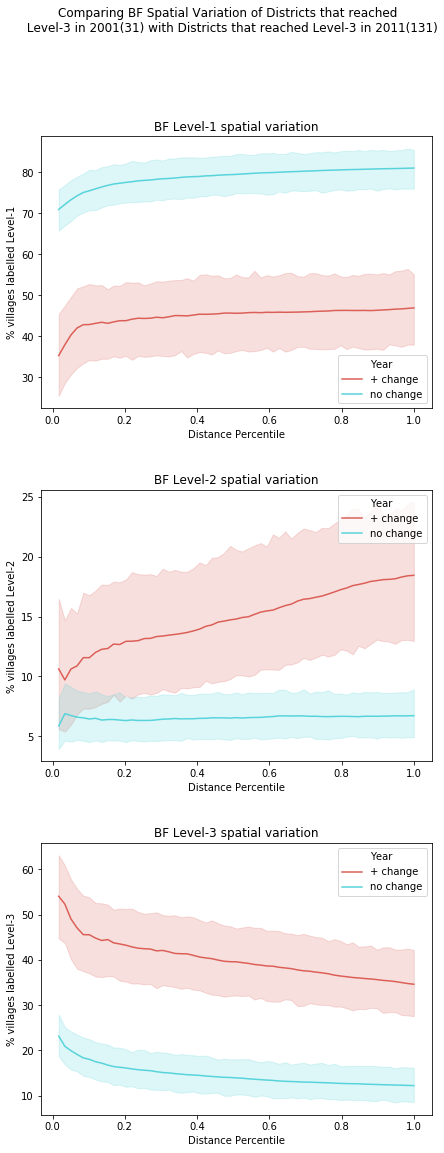

63
99


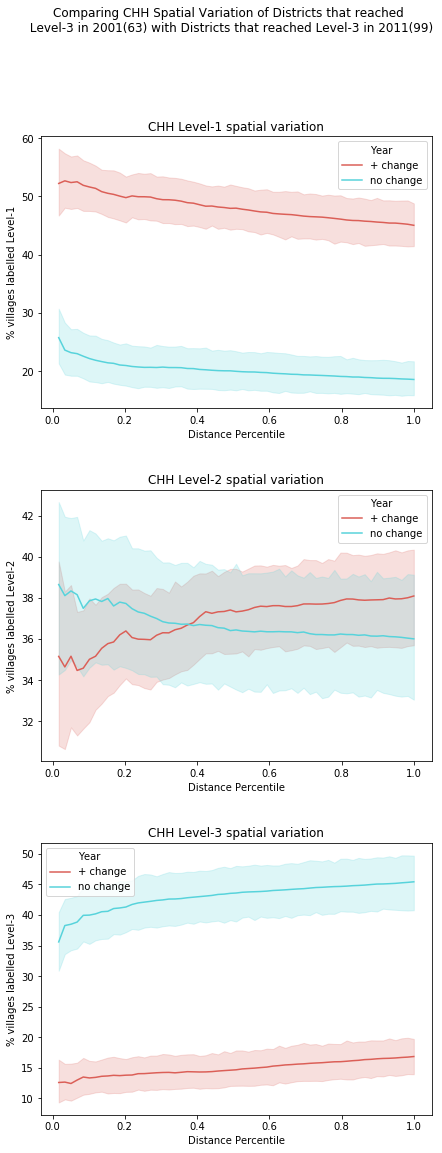

15
149


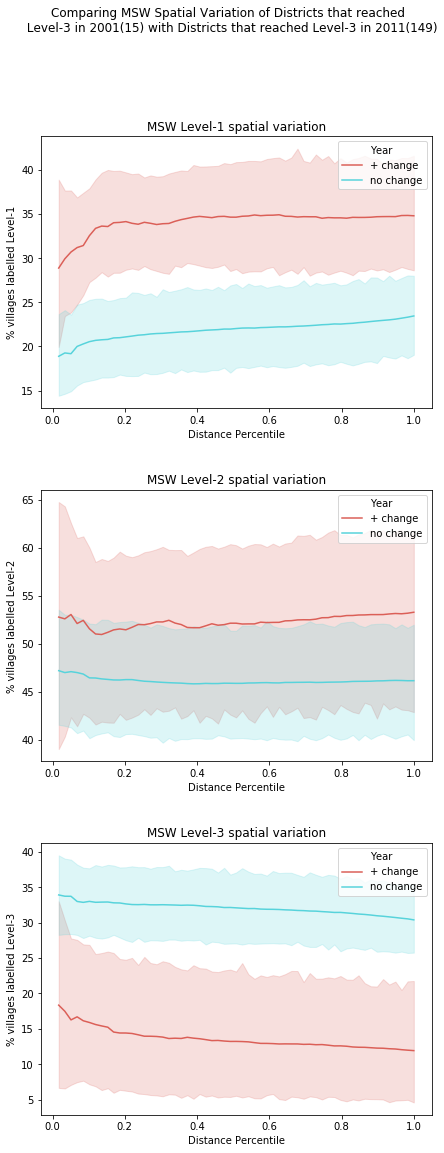

In [71]:
df_master[df_master['BF_2011'] == 3]

,STATE,Name,NAME,District,No_HH,TOT_P,ELG_POP,LIT,F_EMP,F_EMP_Female,...,F_marg_2011_L,Ind_2011,Ind_2001,Ind_change,LIT_2001,LIT_2011,LIT_Change,Formal_EMP_2001,Formal emp 2011,Formal emp change
214,10,BIHAR,Patna,230,726364,4718592,3899598,62.916767,4.242078,7.523890,...,1,2,2,0,1,2,1,2,2,0
427,24,GUJARAT,Kachchh,468,320588,1583225,1328777,59.790544,6.529237,11.295671,...,3,2,2,0,1,2,1,2,3,1
430,24,GUJARAT,Mahesana,471,364447,1837892,1579753,75.215809,12.073470,21.574685,...,3,2,2,0,2,3,1,1,3,1
432,24,GUJARAT,Gandhinagar,473,269440,1334455,1148759,76.589955,10.743855,19.391914,...,2,2,2,0,2,3,1,3,3,0
433,24,GUJARAT,Ahmadabad,474,1150588,5816519,5046853,79.497857,4.691478,8.635127,...,2,4,4,0,3,3,0,1,3,1
435,24,GUJARAT,Rajkot,476,597990,3169881,2742697,74.158611,7.171919,12.874453,...,3,4,4,0,2,3,1,1,3,1
436,24,GUJARAT,Jamnagar,477,350105,1904278,1630010,66.484009,6.934129,12.246169,...,3,2,2,0,1,2,1,3,3,0
437,24,GUJARAT,Porbandar,478,105893,536835,460736,68.623246,6.288200,11.099788,...,3,2,2,0,2,2,0,3,3,0
438,24,GUJARAT,Junagadh,479,432884,2448173,2078482,67.783989,6.821084,11.855852,...,3,2,2,0,1,2,1,1,2,1
439,24,GUJARAT,Amreli,480,248677,1393918,1195261,66.092510,8.713996,15.044235,...,3,1,2,-1,1,2,1,3,2,-1


In [86]:
def state_illustrate(attr):
    df_plot = df_cdf.loc[df_cdf['District'].isin(df_master.loc[df_master[attr+'_2011'] == 3, 'District']), :]
    plot = sns.lineplot(x="To", y=attr+'_RUD', hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_plot['Name']))), legend='full', data=df_plot)
    plt.show()
    plot = sns.lineplot(x="To", y=attr+'_INT', hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_plot['Name']))), legend='full', data=df_plot)
    plt.show()
    plot = sns.lineplot(x="To", y=attr+'_ADV', hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_plot['Name']))), legend='full', data=df_plot)
    plt.show()

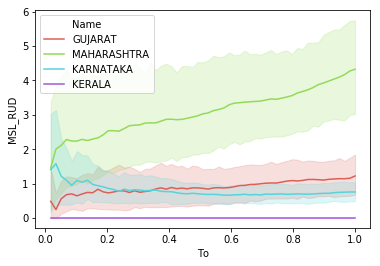

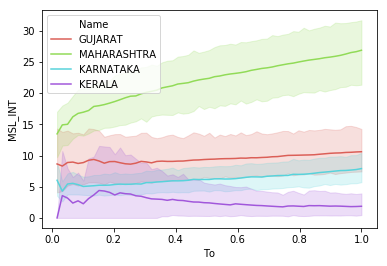

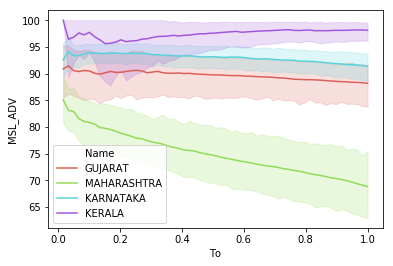

In [93]:
state_illustrate('MSL')

72


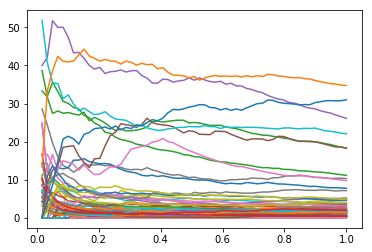

In [118]:
df_pdf = pd.read_csv('data/spatial-pdf-ma-test.csv')
df_cdf = pd.read_csv('data/spatial-cdf-ma-test.csv')
df_cdf = df_cdf.merge(df_master.loc[:, ['District', 'State', 'Name', 'NAME']])

def illustrate(attr, n):
#     dists_2001 = df_master.loc[df_master[attr+'_2001'] == 2, 'District']
#     dists_2001 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] == n), 'District']
    dists_2001 = df_master.loc[df_master[attr+'_2011'] > df_master[attr+'_2001'], 'District']
    print(len(dists_2001))
#     dists_2011 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] != n), 'District']
    dists_2011 = df_master.loc[df_master[attr+'_2011'] == df_master[attr+'_2001'], 'District']
    print(len(dists_2011))
    df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
    df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
    df_2001.loc[:, 'Year'] = '+ change'
    df_2011.loc[:, 'Year'] = 'no change'
    df_comb = pd.concat([df_2001, df_2011])
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 18))
#     fig.subplots_adjust()
    fig.subplots_adjust(hspace=0.3)
    fig.suptitle('Comparing '+attr+' Spatial Variation of Districts that reached \n Level-'+str(n)+' in 2001('+str(len(dists_2001))+') with Districts that reached Level-'+str(n)+' in 2011('+str(len(dists_2011))+')')
    ax = axes.ravel()
    
    sns.lineplot(x="To", y=attr+'_RUD', ax=ax[0], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
#     sns.lineplot(x="To", y=attr+'_RUD', ax=ax[0], palette=sns.color_palette("hls"), legend='full', data=df_2011)
    ax[0].set(title=attr+' Level-1 spatial variation', ylabel='% villages labelled Level-1', xlabel='Distance Percentile')

    sns.lineplot(x="To", y=attr+'_INT', ax=ax[1], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
#     sns.lineplot(x="To", y=attr+'_INT', ax=ax[1], palette=sns.color_palette("hls"), legend='full', data=df_2011)
    ax[1].set(title=attr+' Level-2 spatial variation', ylabel='% villages labelled Level-2', xlabel='Distance Percentile')

    sns.lineplot(x="To", y=attr+'_ADV', ax=ax[2], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
#     sns.lineplot(x="To", y=attr+'_ADV', ax=ax[2], palette=sns.color_palette("hls"), legend='full', data=df_2011)
    ax[2].set(title=attr+' Level-3 spatial variation', ylabel='% villages labelled Level-3', xlabel='Distance Percentile')
#     print(df_2001)
#     print(df_2011)
    if not os.path.exists('new-plots/'):
        os.makedirs('new-plots/')
#     plt.savefig('new-plots/'+attr.lower()+'-level-'+str(n)+'.png')
    plt.show()